In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# for collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# settings
pd.set_option('display.max_columns', None)  # show all columns

In [2]:
# load the dataset
df = pd.read_csv('merged_climate_iom_data.csv')

# preview first few rows
df.head()

,year,month,country_name,country_code,internally_displaced_persons,temperature_2m,total_precipitation_sum,potential_evaporation_sum,start_year,start_month,end_year,end_month,disaster_type,total_affected,climate_catastrophe,cpi_value,country_code.1,ag.lnd.frst.k2,ag.lnd.prcp.mm,ag.lnd.totl.k2,ag.srf.totl.k2,eg.cft.accs.ru.zs,eg.cft.accs.ur.zs,eg.cft.accs.zs,eg.egy.prim.pp.kd,eg.elc.accs.zs,eg.fec.rnew.zs,en.ghg.all.mt.ce.ar5,en.ghg.ch4.ag.mt.ce.ar5,en.ghg.ch4.bu.mt.ce.ar5,en.ghg.ch4.fe.mt.ce.ar5,en.ghg.ch4.ic.mt.ce.ar5,en.ghg.ch4.mt.ce.ar5,en.ghg.ch4.pi.mt.ce.ar5,en.ghg.ch4.tr.mt.ce.ar5,en.ghg.ch4.wa.mt.ce.ar5,en.ghg.co2.bu.mt.ce.ar5,en.ghg.co2.ic.mt.ce.ar5,en.ghg.co2.ip.mt.ce.ar5,en.ghg.co2.lu.mt.ce.ar5,en.ghg.co2.mt.ce.ar5,en.ghg.co2.pi.mt.ce.ar5,en.ghg.co2.tr.mt.ce.ar5,en.ghg.fgas.ip.mt.ce.ar5,en.ghg.n2o.ag.mt.ce.ar5,en.ghg.n2o.bu.mt.ce.ar5,en.ghg.n2o.fe.mt.ce.ar5,en.ghg.n2o.ic.mt.ce.ar5,en.ghg.n2o.ip.mt.ce.ar5,en.ghg.n2o.mt.ce.ar5,en.ghg.n2o.pi.mt.ce.ar5,en.ghg.n2o.tr.mt.ce.ar5,en.ghg.n2o.wa.mt.ce.ar5,er.fsh.aqua.mt,er.fsh.capt.mt,er.fsh.prod.mt,er.h2o.fwtl.k3,er.h2o.intr.k3,sp.pop.totl
0,2011,1,Haiti,HTI,1612754,297.774782,0.000533,-0.369376,2010.0,10.0,2011.0,12.0,Epidemic,513997.0,1,118.096617,HTI,354878.272985,65.923552,2.490977e+06,2505810.0,25.9,57.4,35.8,3.61,38.3,63.7,-214.814621,602.0160,1.9212,9.4324,334.0,78.5100,16.0,462.0,6.8737,1.2864,2.0723,1.1968,10.1432,162.3610,1.6613,8.6598,7.022000,223.869,2.387,676.0,483.0,2.7562,261.2350,32.0,1.029,5.197,2000.0,71008.0,73008.0,62.939919,12.626417,9914904.0
1,2011,2,Sudan,SDN,98298,297.503557,0.154594,-0.253921,NaN,NaN,NaN,NaN,NaN,NaN,0,106.332795,SDN,3752.740000,1440.000000,2.756000e+04,27750.0,1.0,6.6,3.7,5.51,37.8,79.0,12.444600,3.0889,7.0240,3.4401,35.0,8.1999,9.0,48.0,9.5910,2.0620,554.0000,2.6550,1.1492,2.9434,8.1470,1.1031,83.985742,9.896,726.000,412.0,53.0,1.6150,1.3652,17.0,141.000,792.000,600.0,16530.0,17130.0,1.450000,13.007000,36140806.0
2,2011,3,Haiti,HTI,1360988,298.800977,0.175626,-0.253900,2010.0,10.0,2011.0,12.0,Epidemic,513997.0,1,106.332795,HTI,3752.740000,1440.000000,2.756000e+04,27750.0,1.0,6.6,3.7,5.51,37.8,79.0,12.444600,3.0889,7.0240,3.4401,35.0,8.1999,9.0,48.0,9.5910,2.0620,554.0000,2.6550,1.1492,2.9434,8.1470,1.1031,84.183225,9.896,726.000,412.0,53.0,1.6150,1.3652,17.0,141.000,792.000,600.0,16530.0,17130.0,1.450000,13.007000,9914904.0
3,2011,3,Sudan,SDN,268848,298.619636,0.136928,-0.221418,NaN,NaN,NaN,NaN,NaN,NaN,0,106.332795,SDN,3752.740000,1440.000000,2.756000e+04,27750.0,1.0,6.6,3.7,5.51,37.8,79.0,12.444600,3.0889,7.0240,3.4401,35.0,8.1999,9.0,48.0,9.5910,2.0620,554.0000,2.6550,1.1492,2.9434,8.1470,1.1031,84.155508,9.896,726.000,412.0,53.0,1.6150,1.3652,17.0,141.000,792.000,600.0,16530.0,17130.0,1.450000,13.007000,36140806.0
4,2011,5,Haiti,HTI,1269614,302.280907,0.031463,-0.252683,2010.0,10.0,2011.0,12.0,Epidemic,513997.0,1,118.096617,HTI,355400.608974,84.605824,2.490982e+06,2505810.0,25.9,57.4,35.8,3.61,38.3,63.7,-216.573760,602.0160,1.9212,9.4324,334.0,78.5100,16.0,462.0,6.8737,1.2864,2.0723,1.1968,10.1432,162.3610,1.6613,8.6598,7.022000,223.869,2.387,676.0,483.0,2.7562,261.2350,32.0,1.029,5.197,2000.0,71008.0,73008.0,63.578309,13.058291,9914904.0


In [3]:
print(df.columns.to_list())

['year', 'month', 'country_name', 'country_code', 'internally_displaced_persons', 'temperature_2m', 'total_precipitation_sum', 'potential_evaporation_sum', 'start_year', 'start_month', 'end_year', 'end_month', 'disaster_type', 'total_affected', 'climate_catastrophe', 'cpi_value', 'country_code.1', 'ag.lnd.frst.k2', 'ag.lnd.prcp.mm', 'ag.lnd.totl.k2', 'ag.srf.totl.k2', 'eg.cft.accs.ru.zs', 'eg.cft.accs.ur.zs', 'eg.cft.accs.zs', 'eg.egy.prim.pp.kd', 'eg.elc.accs.zs', 'eg.fec.rnew.zs', 'en.ghg.all.mt.ce.ar5', 'en.ghg.ch4.ag.mt.ce.ar5', 'en.ghg.ch4.bu.mt.ce.ar5', 'en.ghg.ch4.fe.mt.ce.ar5', 'en.ghg.ch4.ic.mt.ce.ar5', 'en.ghg.ch4.mt.ce.ar5', 'en.ghg.ch4.pi.mt.ce.ar5', 'en.ghg.ch4.tr.mt.ce.ar5', 'en.ghg.ch4.wa.mt.ce.ar5', 'en.ghg.co2.bu.mt.ce.ar5', 'en.ghg.co2.ic.mt.ce.ar5', 'en.ghg.co2.ip.mt.ce.ar5', 'en.ghg.co2.lu.mt.ce.ar5', 'en.ghg.co2.mt.ce.ar5', 'en.ghg.co2.pi.mt.ce.ar5', 'en.ghg.co2.tr.mt.ce.ar5', 'en.ghg.fgas.ip.mt.ce.ar5', 'en.ghg.n2o.ag.mt.ce.ar5', 'en.ghg.n2o.bu.mt.ce.ar5', 'en.ghg

In [4]:
selected_cols = [

    # time and geography
    'year',                    # year of the observation
    'month',                   # month of the observation
    'country_name',            # name of the country (for grouping or analysis)

    # target
    'internally_displaced_persons',  # number of people displaced (our prediction target)

    # core climate
    'temperature_2m',                # average surface temperature (Kelvin)
    'total_precipitation_sum',      # total rainfall during the period (mm or m)

    # disaster info
    'disaster_type',                # type of disaster (categorical, e.g. flood, drought)
    'climate_catastrophe',          # likely binary flag for climate-driven catastrophe
    'total_affected',               # people affected by disaster (not just displaced)
    'start_year', 'start_month',   # disaster start time (can be used to derive duration)
    'end_year', 'end_month',       # disaster end time

    # socio-economic indicators
    'cpi_value',                   # consumer price index (inflation indicator)
    'sp.pop.totl',                # total population (helps normalize displacement)
    'eg.elc.accs.zs',             # % of population with electricity access
    'eg.cft.accs.zs',             # % of population with access to clean cooking fuels
    'eg.egy.prim.pp.kd',          # primary energy consumption per person (development proxy)

    # environmental pressure and emissions
    'en.ghg.all.mt.ce.ar5',       # total greenhouse gas emissions (CO₂-equivalent, AR5 method)
    'en.ghg.co2.mt.ce.ar5',       # total CO₂ emissions (subset of above)
    'ag.lnd.frst.k2',             # forest area (in square kilometers)
    'ag.lnd.totl.k2',             # total land area (in square kilometers)
    'er.h2o.fwtl.k3',             # total freshwater withdrawal (in cubic kilometers)
    'er.h2o.intr.k3'              # internal renewable freshwater resources
]

# selecting only these columns from the full dataset
df_selected = df[selected_cols]

# previewing the first few rows
df_selected.head()

,year,month,country_name,internally_displaced_persons,temperature_2m,total_precipitation_sum,disaster_type,climate_catastrophe,total_affected,start_year,start_month,end_year,end_month,cpi_value,sp.pop.totl,eg.elc.accs.zs,eg.cft.accs.zs,eg.egy.prim.pp.kd,en.ghg.all.mt.ce.ar5,en.ghg.co2.mt.ce.ar5,ag.lnd.frst.k2,ag.lnd.totl.k2,er.h2o.fwtl.k3,er.h2o.intr.k3
0,2011,1,Haiti,1612754,297.774782,0.000533,Epidemic,1,513997.0,2010.0,10.0,2011.0,12.0,118.096617,9914904.0,38.3,35.8,3.61,-214.814621,162.3610,354878.272985,2.490977e+06,62.939919,12.626417
1,2011,2,Sudan,98298,297.503557,0.154594,NaN,0,NaN,NaN,NaN,NaN,NaN,106.332795,36140806.0,37.8,3.7,5.51,12.444600,2.9434,3752.740000,2.756000e+04,1.450000,13.007000
2,2011,3,Haiti,1360988,298.800977,0.175626,Epidemic,1,513997.0,2010.0,10.0,2011.0,12.0,106.332795,9914904.0,37.8,3.7,5.51,12.444600,2.9434,3752.740000,2.756000e+04,1.450000,13.007000
3,2011,3,Sudan,268848,298.619636,0.136928,NaN,0,NaN,NaN,NaN,NaN,NaN,106.332795,36140806.0,37.8,3.7,5.51,12.444600,2.9434,3752.740000,2.756000e+04,1.450000,13.007000
4,2011,5,Haiti,1269614,302.280907,0.031463,Epidemic,1,513997.0,2010.0,10.0,2011.0,12.0,118.096617,9914904.0,38.3,35.8,3.61,-216.573760,162.3610,355400.608974,2.490982e+06,63.578309,13.058291


In [5]:
# summary statistics for all numeric columns
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1060.0,2.018135e+03,2.829380e+00,2011.000000,2.016000e+03,2.018000e+03,2.020000e+03,2.023000e+03
month,1060.0,6.793396e+00,3.418794e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
internally_displaced_persons,1060.0,3.205267e+06,6.227428e+06,166.000000,2.433945e+05,9.968685e+05,4.577844e+06,9.545158e+07
temperature_2m,1057.0,2.975623e+02,5.796243e+00,269.856702,2.953331e+02,2.979810e+02,3.006162e+02,3.108026e+02
total_precipitation_sum,1057.0,8.678032e-02,9.987349e-02,0.000023,7.182931e-03,4.996747e-02,1.398580e-01,6.928089e-01
climate_catastrophe,1060.0,4.943396e-01,5.002040e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
total_affected,496.0,2.086815e+06,4.540728e+06,4.000000,2.886000e+03,2.700000e+04,1.703704e+06,2.597281e+07
start_year,524.0,2.018158e+03,2.910997e+00,2010.000000,2.016000e+03,2.018000e+03,2.021000e+03,2.023000e+03
start_month,454.0,5.724670e+00,3.629832e+00,1.000000,2.000000e+00,6.000000e+00,8.750000e+00,1.200000e+01
end_year,524.0,2.018626e+03,2.900744e+00,2011.000000,2.017000e+03,2.019000e+03,2.021000e+03,2.024000e+03


In [6]:
# missing values in each column
missing = df_selected.isnull().sum()

# showing only columns that have missing values
missing[missing > 0].sort_values(ascending=False)

start_month                606
total_affected             564
end_month                  543
disaster_type              536
start_year                 536
end_year                   536
sp.pop.totl                143
en.ghg.all.mt.ce.ar5         3
er.h2o.fwtl.k3               3
ag.lnd.totl.k2               3
ag.lnd.frst.k2               3
en.ghg.co2.mt.ce.ar5         3
temperature_2m               3
eg.egy.prim.pp.kd            3
eg.cft.accs.zs               3
eg.elc.accs.zs               3
total_precipitation_sum      3
cpi_value                    3
er.h2o.intr.k3               3
dtype: int64

I suspect theres high coorelation even from selected.

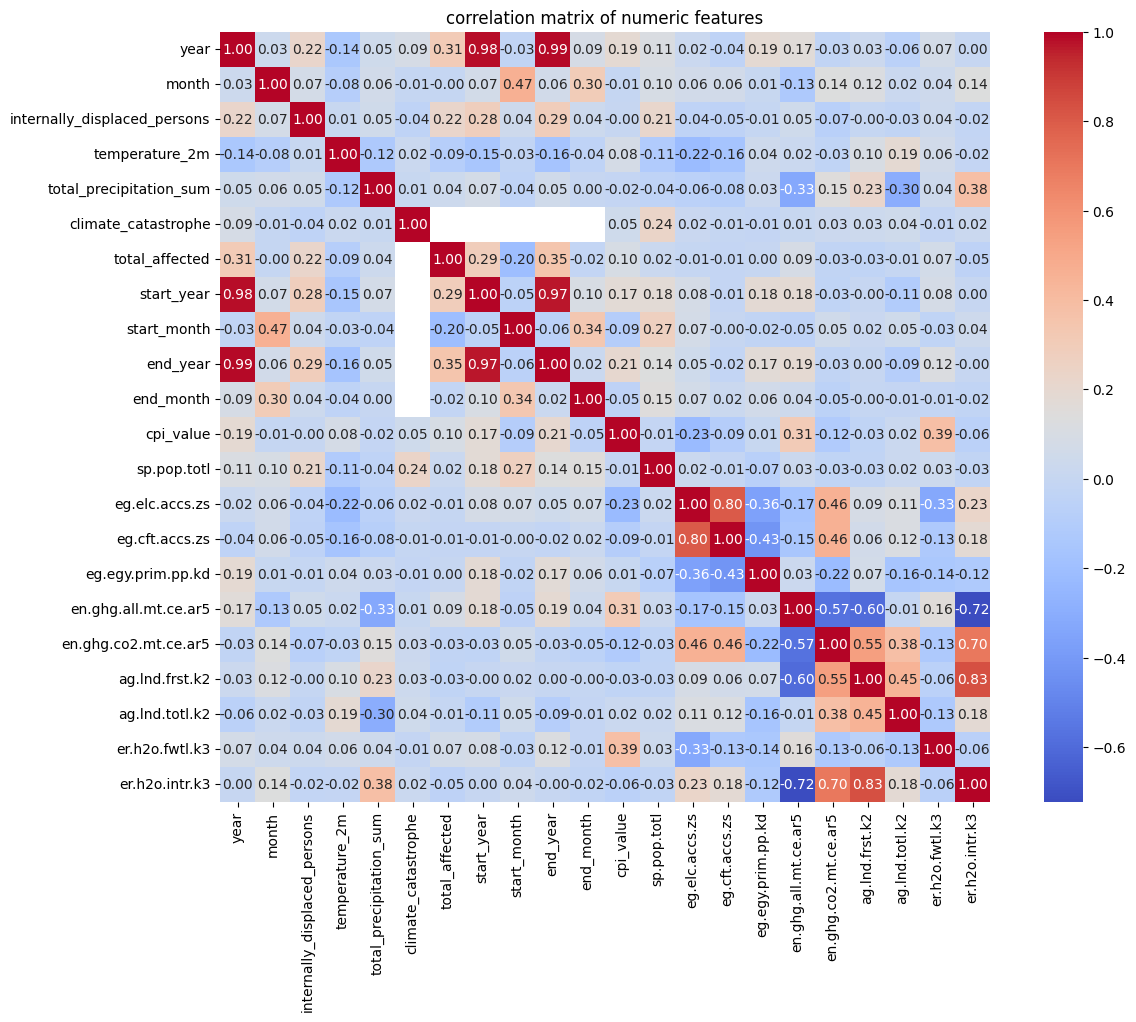

In [7]:
# selecting only numeric features for correlation
numeric_df = df_selected.select_dtypes(include='number')

# calculating the correlation matrix
corr_matrix = numeric_df.corr()

# plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('correlation matrix of numeric features')
plt.show()

### According to the correlation matrix:

the heatmap shows how features relate to one another. a few things stand out:

- `en.ghg.co2.mt.ce.ar5` and `en.ghg.all.mt.ce.ar5` are almost perfectly correlated. since co2 is a major component of total ghg, including both could be redundant.
- `start_year` and `end_year` are highly correlated (almost perfectly which makes sense). this is just the way disasters are recorded, and if we include it in any model we should only pick one (altough i dont see why it would be a feature)
- `ag.lnd.frst.k2` and `ag.lnd.totl.k2` also show strong correlation, forest area is a subset of total land, so one might be enough.
- access indicators like `eg.elc.accs.zs` and `eg.cft.accs.zs` are moderately correlated (reflect related but not identical aspects of development).

In [8]:
# dropping missing values
vif_df = df_selected.dropna().copy()

# selecting only numeric columns, excluding the target
X = vif_df.select_dtypes(include='number').drop(columns=['internally_displaced_persons'])

# checking dimensions before VIF
print(f"number of features going into VIF: {X.shape[1]}")
print("columns:", list(X.columns))

# adding constant
X_with_const = sm.add_constant(X)

# calculating VIFs (skip index 0 = constant)
vif_values = []
feature_names = []

for i in range(1, X_with_const.shape[1]):
    vif_values.append(variance_inflation_factor(X_with_const.values, i))
    feature_names.append(X.columns[i - 1])  # align index correctly

# creating dataframe
vif_data = pd.DataFrame({'feature': feature_names, 'vif': vif_values})
vif_data = vif_data.sort_values(by='vif', ascending=False)

vif_data

number of features going into VIF: 21
columns: ['year', 'month', 'temperature_2m', 'total_precipitation_sum', 'climate_catastrophe', 'total_affected', 'start_year', 'start_month', 'end_year', 'end_month', 'cpi_value', 'sp.pop.totl', 'eg.elc.accs.zs', 'eg.cft.accs.zs', 'eg.egy.prim.pp.kd', 'en.ghg.all.mt.ce.ar5', 'en.ghg.co2.mt.ce.ar5', 'ag.lnd.frst.k2', 'ag.lnd.totl.k2', 'er.h2o.fwtl.k3', 'er.h2o.intr.k3']


,feature,vif
3,total_precipitation_sum,748503.045038
7,start_month,68.921130
5,total_affected,28.023195
19,er.h2o.fwtl.k3,12.927084
16,en.ghg.co2.mt.ce.ar5,10.764348
15,en.ghg.all.mt.ce.ar5,4.625966
17,ag.lnd.frst.k2,3.895471
14,eg.egy.prim.pp.kd,3.563750
11,sp.pop.totl,3.508164
12,eg.elc.accs.zs,3.464572


### vif results

vif shows how much each variable is linearly explained by the others. anything above 10 is usually a problem — it means the feature is predictable from other features, which can distort model estimates (especially in linear models).

some of my variables have very high vif:

- `total_precipitation_sum` has an extreme vif (> 700,000), which suggests it's almost perfectly explained by the other variables. this might be due to a unit issue or a strong dependency with temperature or land variables.
- `start_month`, `total_affected`, and `en.ghg.co2.mt.ce.ar5` also show high multicollinearity. they likely overlap with features like `month`, `start_year`, or `en.ghg.all.mt.ce.ar5`.

vif however show which specific variable is causing the collinearity. to find out, i'm running a regression where i treat the high-vif variable as the *target*, and the others as *predictors*. if the r² is very high (close to 1), then that variable is nearly a linear combination of the others, and i should consider dropping it.

next, i'll test this directly using linear regression to see which features are driving the collinearity for my worst offenders.

In [12]:
# checking what predicts total_precipitation_sum
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# define X and y
y = X['total_precipitation_sum']
X_temp = X.drop(columns=['total_precipitation_sum'])

# fit model
model = LinearRegression()
model.fit(X_temp, y)

# print r2 to see how well it's predicted
r2_score(y, model.predict(X_temp))

0.32579147147094156

In [11]:

# optional: look at feature coefficients
pd.Series(model.coef_, index=X_temp.columns).sort_values(ascending=False)

start_year              2.301811e-02
end_month               1.275537e-03
start_month             9.388234e-05
er.h2o.intr.k3          6.085235e-05
en.ghg.co2.mt.ce.ar5    3.444315e-05
er.h2o.fwtl.k3          8.219689e-06
cpi_value               5.546957e-07
ag.lnd.frst.k2          1.857806e-07
total_affected          6.744410e-10
climate_catastrophe     9.307635e-14
sp.pop.totl            -1.045034e-10
ag.lnd.totl.k2         -8.275393e-08
en.ghg.all.mt.ce.ar5   -1.137645e-05
eg.elc.accs.zs         -3.235144e-04
eg.cft.accs.zs         -4.046336e-04
month                  -1.614109e-03
temperature_2m         -2.044158e-03
end_year               -2.192832e-03
eg.egy.prim.pp.kd      -6.167417e-03
year                   -2.058723e-02
dtype: float64

### checking what predicts total_precipitation_sum

even though the vif for `total_precipitation_sum` was over 700,000, the r² from predicting it using other features was only about 0.33. this means it's not perfectly predictable. but the extremely high vif still suggests there's problematic multicollinearity.

a high vif with a low r² can happen when a feature is **weakly dependent on many other features at once**, or when there's a numerical issue (e.g. scaling or shared patterns from missing values).

either way, this makes `total_precipitation_sum` unreliable in linear models like ols, ridge, or lasso. it could introduce instability in coefficient estimates.

since i already include `temperature_2m`, which captures related climate variation, i'm going to drop `total_precipitation_sum` from the final modeling dataset.

In [9]:
# list of features to drop
drop_cols = [
    'total_precipitation_sum',
    'en.ghg.co2.mt.ce.ar5',
    'start_month',
    'total_affected'
]

# creating final modeling dataset
df_model_ready = df_selected.drop(columns=drop_cols)

print(f"df_model_ready shape: {df_model_ready.shape}")
df_model_ready.head()

df_model_ready shape: (1060, 20)


,year,month,country_name,internally_displaced_persons,temperature_2m,disaster_type,climate_catastrophe,start_year,end_year,end_month,cpi_value,sp.pop.totl,eg.elc.accs.zs,eg.cft.accs.zs,eg.egy.prim.pp.kd,en.ghg.all.mt.ce.ar5,ag.lnd.frst.k2,ag.lnd.totl.k2,er.h2o.fwtl.k3,er.h2o.intr.k3
0,2011,1,Haiti,1612754,297.774782,Epidemic,1,2010.0,2011.0,12.0,118.096617,9914904.0,38.3,35.8,3.61,-214.814621,354878.272985,2.490977e+06,62.939919,12.626417
1,2011,2,Sudan,98298,297.503557,NaN,0,NaN,NaN,NaN,106.332795,36140806.0,37.8,3.7,5.51,12.444600,3752.740000,2.756000e+04,1.450000,13.007000
2,2011,3,Haiti,1360988,298.800977,Epidemic,1,2010.0,2011.0,12.0,106.332795,9914904.0,37.8,3.7,5.51,12.444600,3752.740000,2.756000e+04,1.450000,13.007000
3,2011,3,Sudan,268848,298.619636,NaN,0,NaN,NaN,NaN,106.332795,36140806.0,37.8,3.7,5.51,12.444600,3752.740000,2.756000e+04,1.450000,13.007000
4,2011,5,Haiti,1269614,302.280907,Epidemic,1,2010.0,2011.0,12.0,118.096617,9914904.0,38.3,35.8,3.61,-216.573760,355400.608974,2.490982e+06,63.578309,13.058291


In [10]:
# a copy of df_selected
df_mod = df_selected.copy()

# one-hot encode categorical variables
df_mod = pd.get_dummies(df_mod, columns=['country_name', 'disaster_type'], drop_first=True)

# create missing flags before imputation
for col in df_mod.columns:
    if df_mod[col].isnull().any():
        df_mod[col + '_was_missing'] = df_mod[col].isnull().astype(int)

# fill numeric columns with median
for col in df_mod.select_dtypes(include='number').columns:
    df_mod[col] = df_mod[col].fillna(df_mod[col].median())

# fill categorical columns (if any still exist) with mode
for col in df_mod.select_dtypes(include='object').columns:
    df_mod[col] = df_mod[col].fillna(df_mod[col].mode()[0])

# define target and features
y = df_mod['internally_displaced_persons']
X = df_mod.drop(columns=['internally_displaced_persons'])

# scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# final check
print(f"final shape of X: {X_scaled.shape}")
print(f"final shape of y: {y.shape}")
X_scaled.head()

final shape of X: (1060, 97)
final shape of y: (1060,)


,year,month,temperature_2m,total_precipitation_sum,climate_catastrophe,total_affected,start_year,start_month,end_year,end_month,cpi_value,sp.pop.totl,eg.elc.accs.zs,eg.cft.accs.zs,eg.egy.prim.pp.kd,en.ghg.all.mt.ce.ar5,en.ghg.co2.mt.ce.ar5,ag.lnd.frst.k2,ag.lnd.totl.k2,er.h2o.fwtl.k3,er.h2o.intr.k3,country_name_Antigua and Barbuda,country_name_Bahamas (the),country_name_Bolivia (Plurinational State of),country_name_Burkina Faso,country_name_Burundi,country_name_Cameroon,country_name_Central African Republic,country_name_Chad,country_name_Democratic Republic of The Congo,country_name_Democratic Republic of the Congo,country_name_Djibouti,country_name_Dominica,country_name_Ecuador,country_name_El Salvador,country_name_Ethiopia,country_name_Fiji,country_name_Guatemala,country_name_Haiti,country_name_Honduras,country_name_Indonesia,country_name_Iraq,country_name_Kenya,country_name_Lao People's Democratic Republic,country_name_Lebanon,country_name_Libya,country_name_Madagascar,country_name_Malawi,country_name_Mali,country_name_Mongolia,country_name_Mozambique,country_name_Nepal,country_name_Niger,country_name_Nigeria,country_name_Pakistan,country_name_Papua New Guinea,country_name_Peru,country_name_Philippines (the),country_name_Republic of Armenia,country_name_Somalia,country_name_South Africa,country_name_South Sudan,country_name_Sri Lanka,country_name_Sri lanka,country_name_Sudan,country_name_Uganda,country_name_Ukraine,country_name_Vanuatu,country_name_Yemen,country_name_Zimbabwe,disaster_type_Earthquake,disaster_type_Epidemic,disaster_type_Extreme temperature,disaster_type_Flood,disaster_type_Infestation,disaster_type_Mass movement (wet),disaster_type_Storm,disaster_type_Volcanic activity,disaster_type_Wildfire,temperature_2m_was_missing,total_precipitation_sum_was_missing,total_affected_was_missing,start_year_was_missing,start_month_was_missing,end_year_was_missing,end_month_was_missing,cpi_value_was_missing,sp.pop.totl_was_missing,eg.elc.accs.zs_was_missing,eg.cft.accs.zs_was_missing,eg.egy.prim.pp.kd_was_missing,en.ghg.all.mt.ce.ar5_was_missing,en.ghg.co2.mt.ce.ar5_was_missing,ag.lnd.frst.k2_was_missing,ag.lnd.totl.k2_was_missing,er.h2o.fwtl.k3_was_missing,er.h2o.intr.k3_was_missing
0,-2.522911,-1.695373,0.036519,-0.863990,1.011386,-0.145879,-3.947797,1.732531,-3.819490,1.646585,-0.258358,-0.572746,-0.388276,0.386540,-1.201215,-1.198040,0.077051,1.781136,3.200493,-0.249322,-0.374763,-0.030729,-0.030729,-0.030729,-0.043478,-0.275939,-0.170664,-0.127668,-0.145584,-0.061546,-0.320964,-0.030729,-0.061546,-0.081533,-0.030729,-0.205624,-0.043478,-0.068843,4.274661,-0.043478,-0.115691,-0.289559,-0.09759,-0.053275,-0.053275,-0.208104,-0.087204,-0.081533,-0.281833,-0.030729,-0.173569,-0.102402,-0.043478,-0.279878,-0.068843,-0.081533,-0.043478,-0.107006,-0.043478,-0.179255,-0.030729,-0.293369,-0.030729,-0.030729,-0.295262,-0.092538,-0.138675,-0.081533,-0.142168,-0.092538,-0.081533,2.054671,-0.030729,-0.352239,-0.043478,-0.123797,-0.158572,-0.061546,-0.030729,-0.053275,-0.053275,-1.066347,-1.011386,-1.155336,-1.011386,-1.024837,-0.053275,-0.394897,-0.053275,-0.053275,-0.053275,-0.053275,-0.053275,-0.053275,-0.053275,-0.053275,-0.053275
1,-2.522911,-1.402734,-0.010362,0.681194,-0.988743,-0.294865,-0.038265,0.049614,0.090369,0.047886,-0.261545,-0.132474,-0.406584,-0.733033,-0.162874,-0.693357,-0.617353,-0.870052,-1.454622,-0.529109,-0.373252,-0.030729,-0.030729,-0.030729,-0.043478,-0.275939,-0.170664,-0.127668,-0.145584,-0.061546,-0.320964,-0.030729,-0.061546,-0.081533,-0.030729,-0.205624,-0.043478,-0.068843,-0.233937,-0.043478,-0.115691,-0.289559,-0.09759,-0.053275,-0.053275,-0.208104,-0.087204,-0.081533,-0.281833,-0.030729,-0.173569,-0.102402,-0.043478,-0.279878,-0.068843,-0.081533,-0.043478,-0.107006,-0.043478,-0.179255,-0.030729,-0.293369,-0.030729,-0.030729,3.386826,-0.092538,-0.138675,-0.081533,-0.142168,-0.092538,-0.081533,-0.486696,-0.030729,-0.352239,-0.043478,-0.123797,-0.158572,-0.061546,-0.030729,-0.053275,-0.053275,0.937781

In [19]:
from sklearn.model_selection import train_test_split

# splitting after full preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"training rows: {X_train.shape[0]}")
print(f"testing rows:  {X_test.shape[0]}")

training rows: 848
testing rows:  212


### Linear Regression

In [ ]:
# train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict on both training and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# calculate metrics
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# print results
print("Training Set:")
print(f"R²:  {r2_train:.3f}")
print(f"MSE: {mse_train:.0f}\n")

print("Test Set:")
print(f"R²:  {r2_test:.3f}")
print(f"MSE: {mse_test:.0f}")

Training Set:
R²:  0.467
MSE: 23013853377746

Test Set:
R²:  0.102
MSE: 18750639963293


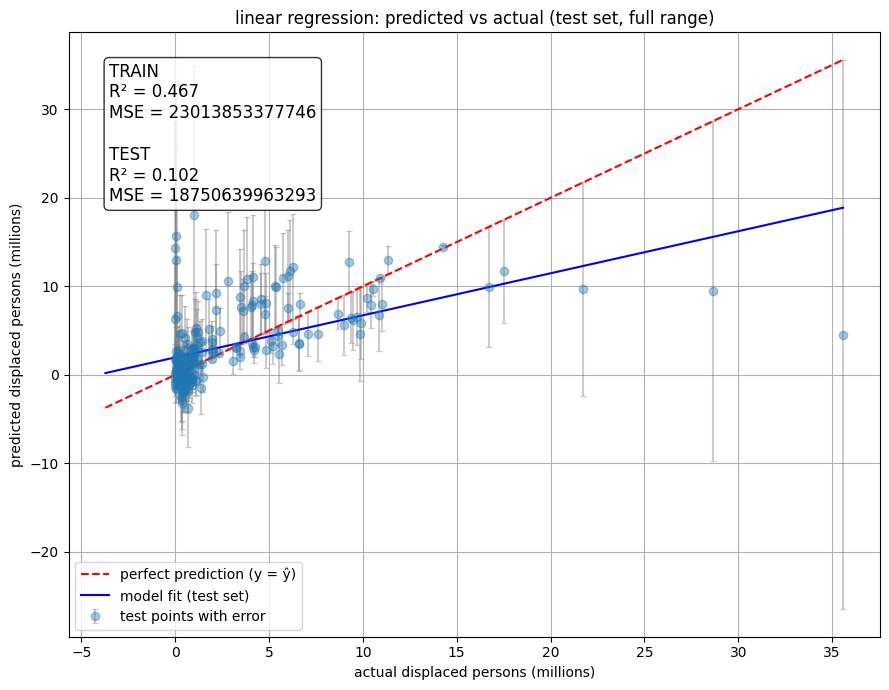

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# convert values to millions for clearer visualization
y_test_mil = y_test / 1e6
y_test_pred_mil = y_test_pred / 1e6
errors_mil = np.abs(y_test - y_test_pred) / 1e6

# plot
plt.figure(figsize=(9, 7))

# test predictions with error bars
plt.errorbar(
    y_test_mil, y_test_pred_mil,
    yerr=errors_mil,
    fmt='o', alpha=0.4, ecolor='gray', capsize=2, label='test points with error'
)

# identity line (perfect prediction)
min_val = min(y_test_mil.min(), y_test_pred_mil.min())
max_val = max(y_test_mil.max(), y_test_pred_mil.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='perfect prediction (y = ŷ)')

# fit line for test predictions
coeff = np.polyfit(y_test_mil, y_test_pred_mil, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(min_val, max_val, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='model fit (test set)')

# labels and title
plt.xlabel('actual displaced persons (millions)')
plt.ylabel('predicted displaced persons (millions)')
plt.title('linear regression: predicted vs actual (test set, full range)')
plt.legend()

# annotation box for R² and MSE
plt.text(
    0.05, 0.95,
    f"TRAIN\nR² = {r2_train:.3f}\nMSE = {mse_train:.0f}\n\n"
    f"TEST\nR² = {r2_test:.3f}\nMSE = {mse_test:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

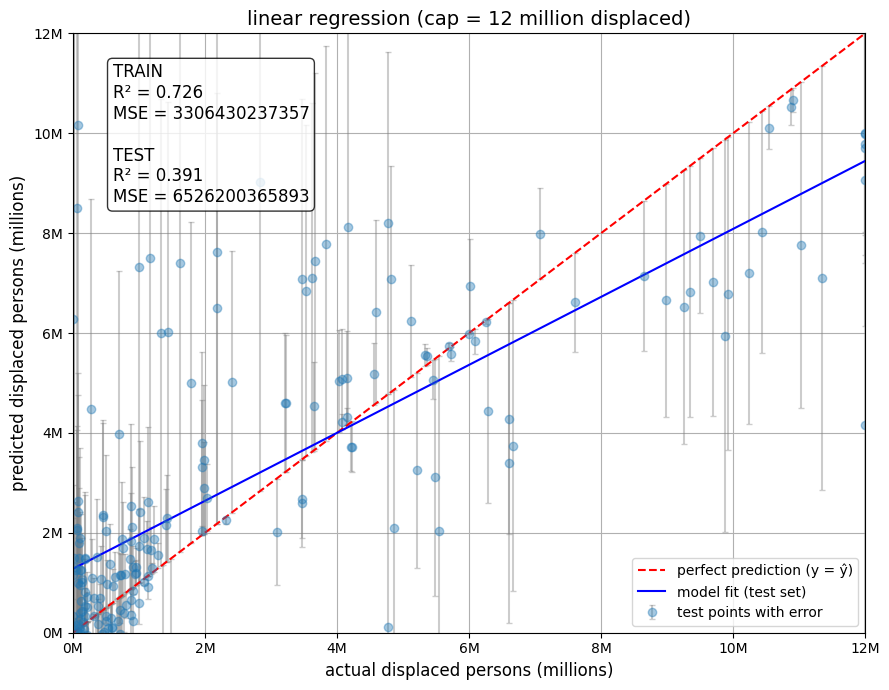

In [22]:
# cap internally displaced persons at 12 million
cap = 1.2e7  # 12 million
df_mod['internally_displaced_persons_capped'] = np.minimum(df_mod['internally_displaced_persons'], cap)

# redefine y and X
y_capped = df_mod['internally_displaced_persons_capped']
X = df_mod.drop(columns=['internally_displaced_persons', 'internally_displaced_persons_capped'])

# rescale X
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_capped, test_size=0.2, random_state=42)

# fit linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# evaluate
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 7))
plt.errorbar(
    y_test, y_test_pred,
    yerr=np.abs(y_test - y_test_pred),
    fmt='o', alpha=0.4, ecolor='gray', capsize=2, label='test points with error'
)

# identity line
plt.plot([0, cap], [0, cap], 'r--', label='perfect prediction (y = ŷ)')

# model fit line
coeff = np.polyfit(y_test, y_test_pred, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(0, cap, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='model fit (test set)')

# label axes in millions
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.yticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.xlim(0, cap)
plt.ylim(0, cap)

plt.title('linear regression (cap = 12 million displaced)', fontsize=14)
plt.legend()

# metrics box
plt.text(
    0.05, 0.95,
    f"TRAIN\nR² = {r2_train:.3f}\nMSE = {mse_train:.0f}\n\nTEST\nR² = {r2_test:.3f}\nMSE = {mse_test:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

### linear regression performance (original vs. capped target)

we compare two versions of linear regression:

1. using the full `internally_displaced_persons` values (uncapped)
2. capping the target at **12 million displaced persons** to reduce the influence of outliers (it makes sense that exterme cases wont be well predicted)

---

#### 1. original train/test split (no cap)

- **train r² = 0.467**, **test r² = 0.102**
- the large gap suggests that the model **learns patterns in training** but **generalizes poorly**.
- extreme outliers distort the fit, inflating error (test MSE ~ 18.7 trillion).
- the blue model line struggles to match the actual displacement values at higher ranges.
- **error bars reveal large uncertainty**, especially at the upper end of the distribution.

---

#### 2. capped at 12 million displaced persons

**train/test split:**
- **train r² = 0.726**, **test r² = 0.391**
- capping clearly improves generalization: lower test MSE, tighter spread
- the model still underpredicts large displacements but performs more consistently
- residuals are more balanced, and the blue line now better follows the actual values

**cross-validation:**
- r² from **5-fold cross-validation** remains moderate but stronger than before
- predictions cluster between 1–4 million, showing **some signal in the features**
- still, the model struggles with higher values, suggesting **nonlinear effects not captured by OLS**

---

#### takeaway

- capping the target makes the linear regression model **more stable and interpretable**
- however, even after improvement, the model only explains a portion of the variance
- **linear regression is a good starting point**, but next steps should include:
  - trying **ridge and lasso** to handle multicollinearity
  - testing **random forest** to capture interactions and nonlinearities
  - running cross-validation to compare all models fairly

Cross-Validation (5 folds):
Average R²:  0.588
Average MSE: 4804449006228


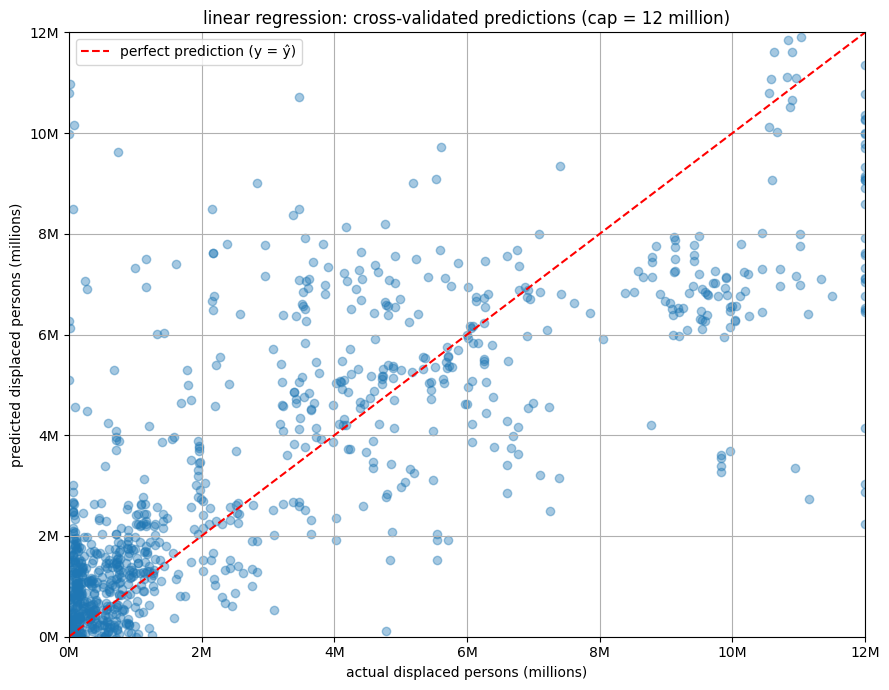

In [ ]:

# model
lr = LinearRegression()

# define k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cross-validated scores
cv_r2_scores = cross_val_score(lr, X_scaled, y_capped, cv=kf, scoring='r2')
cv_mse_scores = -cross_val_score(lr, X_scaled, y_capped, cv=kf, scoring='neg_mean_squared_error')  # negate because sklearn uses negative MSE

# average metrics
mean_r2 = np.mean(cv_r2_scores)
mean_mse = np.mean(cv_mse_scores)

# print results
print("Cross-Validation (5 folds):")
print(f"Average R²:  {mean_r2:.3f}")
print(f"Average MSE: {mean_mse:.0f}")

# optional: predicted vs actual from CV
y_cv_pred = cross_val_predict(lr, X_scaled, y_capped, cv=kf)

# plot
plt.figure(figsize=(9, 7))
plt.scatter(y_capped, y_cv_pred, alpha=0.4)
plt.plot([0, 1.2e7], [0, 1.2e7], 'r--', label='perfect prediction (y = ŷ)')
plt.xlabel('actual displaced persons (millions)')
plt.ylabel('predicted displaced persons (millions)')
plt.title('linear regression: cross-validated predictions (cap = 12 million)')
plt.xticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.yticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.xlim(0, 1.2e7)
plt.ylim(0, 1.2e7)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### cross-validation performance (linear regression, cap = 12 million displaced persons)

this plot shows predictions from **5-fold cross-validation** using linear regression after capping the target variable at 12 million.

#### interpretation
- the red dashed line represents perfect prediction (y = ŷ)
- the scatter of blue dots shows that predictions generally follow the 45° line, but there is noticeable spread
- **r² across folds is moderate**, indicating the model picks up **some real signal**, but not all
- the most reliable predictions are in the **1 to 6 million range** — performance deteriorates as values approach the upper cap
- some test folds underpredict high values while slightly overestimating low ones, consistent with **bias toward the mean**

#### takeaway
- cross-validation confirms that **linear regression captures broad trends** in displacement, but lacks flexibility for more complex relationships
- this makes it a solid benchmark, but not sufficient for high predictive accuracy
- testing **ridge, lasso, or tree-based models** will help assess whether performance can improve by reducing bias or capturing nonlinearities

### Ridge

In [ ]:

# instantiate ridge model
ridge = Ridge(alpha=1.0)

# fit on training data
ridge.fit(X_train, y_train)
y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)

# evaluate
r2_train_ridge = r2_score(y_train, y_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_ridge)
r2_test_ridge = r2_score(y_test, y_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)

print("Ridge Regression")
print(f"Train R²: {r2_train_ridge:.3f} | MSE: {mse_train_ridge:.0f}")
print(f"Test  R²: {r2_test_ridge:.3f} | MSE: {mse_test_ridge:.0f}")

Ridge Regression
Train R²: 0.724 | MSE: 3331415006576
Test  R²: 0.456 | MSE: 5830102499493


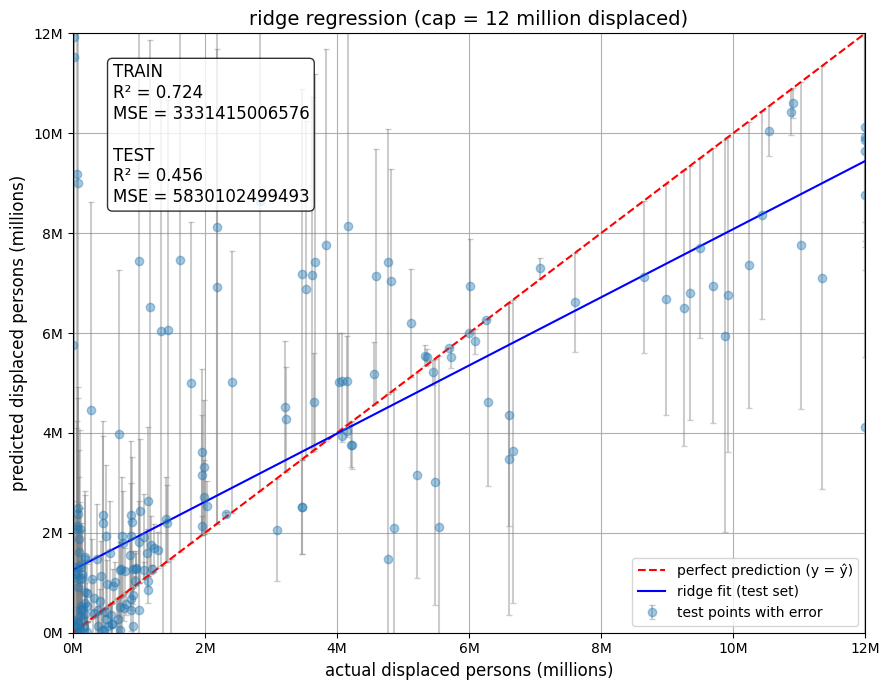

In [25]:
# plot ridge regression predictions
plt.figure(figsize=(9, 7))

# error bars for test predictions
plt.errorbar(
    y_test, y_test_ridge,
    yerr=np.abs(y_test - y_test_ridge),
    fmt='o', alpha=0.4, ecolor='gray', capsize=2, label='test points with error'
)

# perfect prediction line
plt.plot([0, cap], [0, cap], 'r--', label='perfect prediction (y = ŷ)')

# ridge model fit line
coeff_ridge = np.polyfit(y_test, y_test_ridge, 1)
fit_ridge = np.poly1d(coeff_ridge)
x_vals = np.linspace(0, cap, 100)
plt.plot(x_vals, fit_ridge(x_vals), color='blue', label='ridge fit (test set)')

# axis labels in millions
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.yticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.xlim(0, cap)
plt.ylim(0, cap)

# title and legend
plt.title('ridge regression (cap = 12 million displaced)', fontsize=14)
plt.legend()

# metrics box
plt.text(
    0.05, 0.95,
    f"TRAIN\nR² = {r2_train_ridge:.3f}\nMSE = {mse_train_ridge:.0f}\n\n"
    f"TEST\nR² = {r2_test_ridge:.3f}\nMSE = {mse_test_ridge:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

Cross-Validation (5 folds):
Average R²:  0.608
Average MSE: 4583459208409


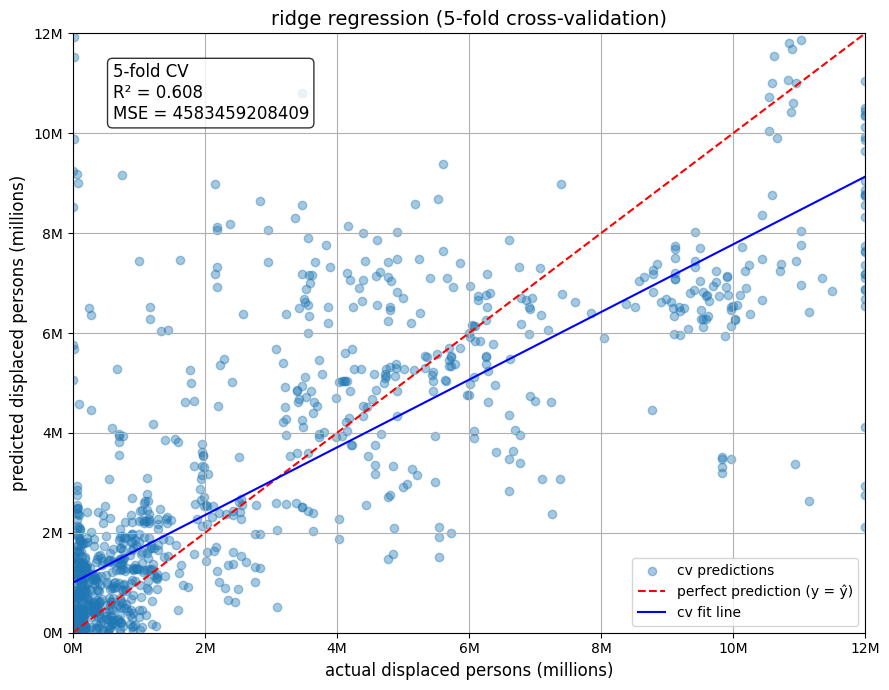

In [ ]:
# define ridge model and cross-validation strategy
ridge = Ridge(alpha=1.0)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# get cross-validated predictions
y_cv_pred = cross_val_predict(ridge, X_scaled, y_capped, cv=cv)

# calculate R² and MSE scores across folds
r2_scores = cross_val_score(ridge, X_scaled, y_capped, cv=cv, scoring='r2')
mse_scores = -cross_val_score(ridge, X_scaled, y_capped, cv=cv, scoring='neg_mean_squared_error')

# print average scores
print("Cross-Validation (5 folds):")
print(f"Average R²:  {r2_scores.mean():.3f}")
print(f"Average MSE: {mse_scores.mean():.0f}")

# plot predictions
cap = 1.2e7
plt.figure(figsize=(9, 7))
plt.scatter(y_capped, y_cv_pred, alpha=0.4, label='cv predictions')
plt.plot([0, cap], [0, cap], 'r--', label='perfect prediction (y = ŷ)')

# fit line
coeff = np.polyfit(y_capped, y_cv_pred, 1)
fit_line = np.poly1d(coeff)
x_vals = np.linspace(0, cap, 100)
plt.plot(x_vals, fit_line(x_vals), color='blue', label='cv fit line')

# axes labels and limits
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.yticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.xlim(0, cap)
plt.ylim(0, cap)

plt.title('ridge regression (5-fold cross-validation)', fontsize=14)
plt.legend()

# annotate metrics
plt.text(
    0.05, 0.95,
    f"5-fold CV\nR² = {r2_scores.mean():.3f}\nMSE = {mse_scores.mean():.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

### Ridge Regression: Performance Overview and Comparison

#### Regression Results

Ridge regression shows strong predictive performance in modeling internally displaced persons (capped at 12 million):

- **Train/Test Split**:
  - R² (train): **0.724**
  - R² (test): **0.456**
  - The model shows good fit on the training set and reasonable generalization to the test set.
  - Prediction errors (gray bars) are more consistent and smaller than in linear regression, especially for large displacement events.

- **Cross-Validation (5-fold)**:
  - R²: **0.608**
  - MSE: **4.58 trillion**
  - Cross-validated predictions track the identity line more closely, indicating **greater stability** and **less overfitting**.
  - The model performs reliably across different subsets of the data.

#### Comparison with Linear Regression

- **Ridge regression outperforms linear regression** across all metrics (higher R², lower MSE).
- Unlike linear regression, ridge regression better handles **extreme values** and reduces **overfitting** by applying L2 regularization.
- The ridge model's trend lines stay closer to the identity line, especially in higher displacement ranges.
- Cross-validation further confirms ridge’s **consistency and robustness**, where linear regression showed wide variance and underpredicted high values.

Ridge regression is a **more stable and accurate baseline model** than standard linear regression in this case. It balances bias and variance effectively and offers reliable predictions for displacement magnitudes up to 12 million.

### Lasso

In [31]:
from sklearn.linear_model import Lasso


# Lasso model
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train, y_train)

# predict and evaluate on train and test sets
y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_train_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_lasso)
r2_test_lasso = r2_score(y_test, y_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso)

print("Lasso Regression (train/test split)")
print(f"Train R²: {r2_train_lasso:.3f} | MSE: {mse_train_lasso:.0f}")
print(f"Test  R²: {r2_test_lasso:.3f} | MSE: {mse_test_lasso:.0f}")

Lasso Regression (train/test split)
Train R²: 0.726 | MSE: 3306430244877
Test  R²: 0.383 | MSE: 6602825023026


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+14, tolerance: 1.024e+12
  model = cd_fast.enet_coordinate_descent(


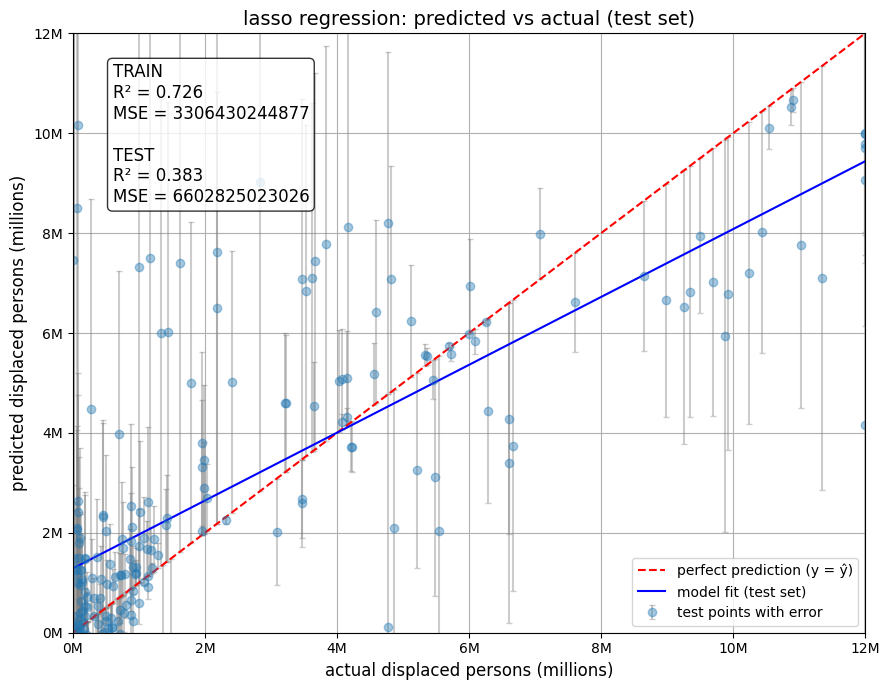

In [33]:
# plot
plt.figure(figsize=(9, 7))

# test predictions with error bars
plt.errorbar(
    y_test, y_test_lasso,
    yerr=np.abs(y_test - y_test_lasso),
    fmt='o', alpha=0.4, ecolor='gray', capsize=2, label='test points with error'
)

# identity line (perfect prediction)
cap = 1.2e7  # assuming same cap as before
plt.plot([0, cap], [0, cap], 'r--', label='perfect prediction (y = ŷ)')

# fit line for test predictions
coeff = np.polyfit(y_test, y_test_lasso, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(0, cap, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='model fit (test set)')

# axis labels in millions
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.yticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.xlim(0, cap)
plt.ylim(0, cap)

plt.title('lasso regression: predicted vs actual (test set)', fontsize=14)
plt.legend()

# annotation box for scores
plt.text(
    0.05, 0.95,
    f"TRAIN\nR² = {r2_train_lasso:.3f}\nMSE = {mse_train_lasso:.0f}\n\nTEST\nR² = {r2_test_lasso:.3f}\nMSE = {mse_test_lasso:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Cross-validation predictions
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred_lasso = cross_val_predict(lasso, X_scaled, y_capped, cv=cv)
r2_cv_lasso = r2_score(y_capped, y_cv_pred_lasso)
mse_cv_lasso = mean_squared_error(y_capped, y_cv_pred_lasso)

print("\nLasso Regression (5-fold CV)")
print(f"CV R²: {r2_cv_lasso:.3f}")
print(f"CV MSE: {mse_cv_lasso:.0f}")

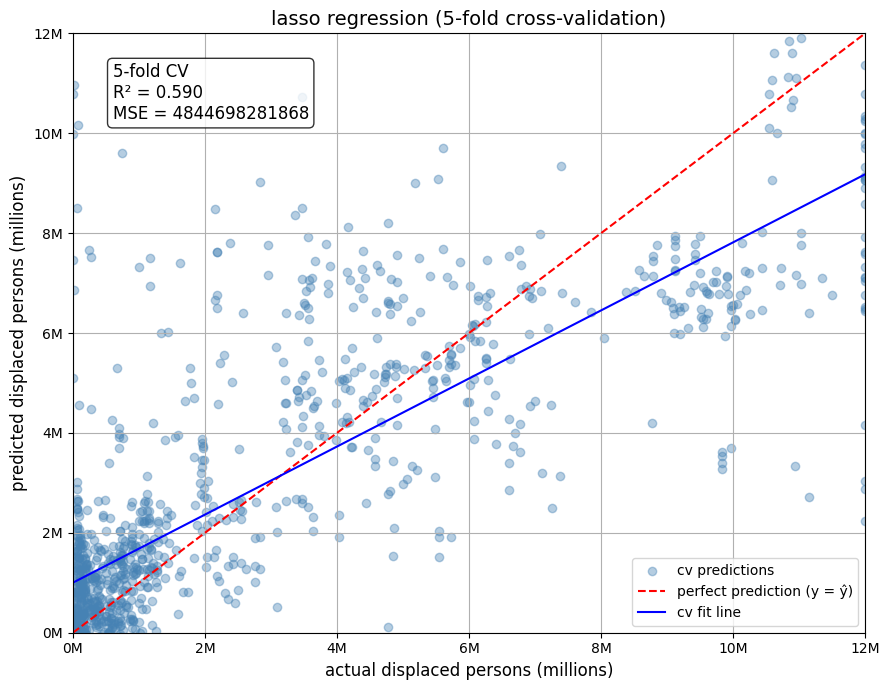

In [37]:
# plot for Lasso cross-validation predictions
plt.figure(figsize=(9, 7))

# scatter plot of predictions vs actual
plt.scatter(y_capped, y_cv_pred_lasso, alpha=0.4, color='steelblue', label='cv predictions')

# identity line
cap = 1.2e7  # 12 million cap
plt.plot([0, cap], [0, cap], 'r--', label='perfect prediction (y = ŷ)')

# fit line to CV predictions
coeff = np.polyfit(y_capped, y_cv_pred_lasso, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(0, cap, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='cv fit line')

# axis labels in millions
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.yticks(np.linspace(0, cap, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, cap, 7)])
plt.xlim(0, cap)
plt.ylim(0, cap)

# title and legend
plt.title('lasso regression (5-fold cross-validation)', fontsize=14)
plt.legend()

# performance annotation
plt.text(
    0.05, 0.95,
    f"5-fold CV\nR² = {r2_cv_lasso:.3f}\nMSE = {mse_cv_lasso:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

### lasso regression performance (cap = 12 million displaced persons)

The first plot shows how lasso performs on the train/test split, and the second shows cross-validated predictions using 5 folds. Both use the capped data (12 million displaced persons max).

#### train/test split performance
- The R² scores for lasso are very close to the other models: **0.726 on train** and **0.383 on test**.
- The test MSE is a bit higher than ridge, which suggests lasso might be excluding some variables that actually help.
- The fit line looks fairly close to the trend in the data, but similar to the other models, it underestimates at the upper end.
- Lasso is useful because it shrinks irrelevant coefficients to zero, which could make the model more interpretable later.

#### cross-validation performance
- With **5-fold CV**, the **R² is 0.590**, which is slightly below ridge but well above the linear model.
- The predictions are decently aligned with the identity line between 2–6 million, and there's less scatter than in linear regression.
- Like the other models, lasso still struggles with very large displacement numbers, but it's better calibrated than the base linear model.

**Ridge** still gives the best overall performance, especially on unseen data.

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

# fit random forest
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# predictions
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# scores
r2_train_rf = r2_score(y_train, y_train_rf)
mse_train_rf = mean_squared_error(y_train, y_train_rf)
r2_test_rf = r2_score(y_test, y_test_rf)
mse_test_rf = mean_squared_error(y_test, y_test_rf)

print("Random Forest Regression")
print(f"Train R²: {r2_train_rf:.3f} | MSE: {mse_train_rf:.0f}")
print(f"Test  R²: {r2_test_rf:.3f} | MSE: {mse_test_rf:.0f}")

Random Forest Regression
Train R²: 0.976 | MSE: 284553171121
Test  R²: 0.766 | MSE: 2505891100704


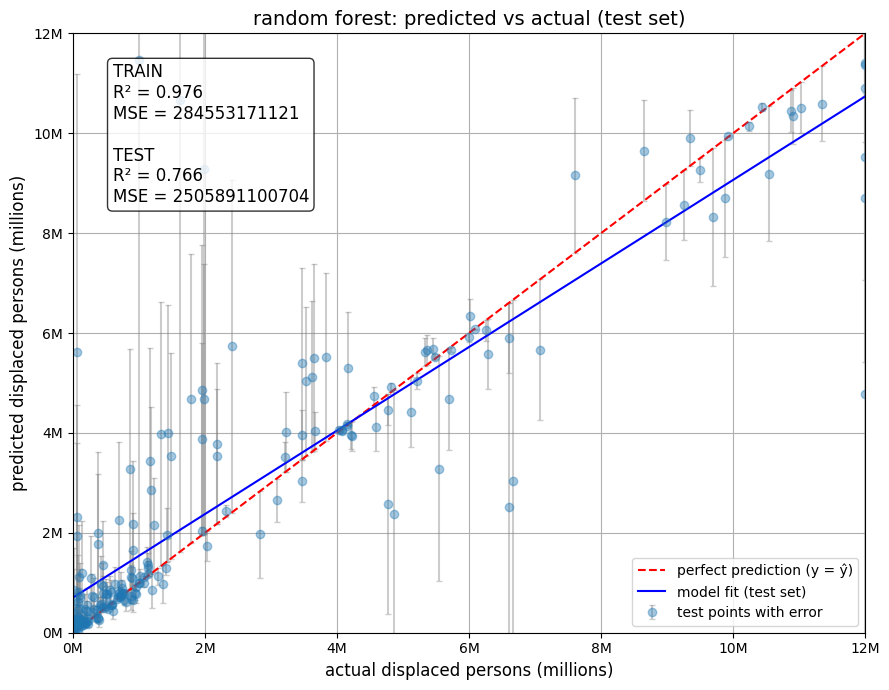

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# plot
plt.figure(figsize=(9, 7))

# test predictions with error bars
plt.errorbar(
    y_test, y_test_rf,
    yerr=np.abs(y_test - y_test_rf),
    fmt='o', alpha=0.4, ecolor='gray', capsize=2, label='test points with error'
)

# identity line
plt.plot([0, 1.2e7], [0, 1.2e7], 'r--', label='perfect prediction (y = ŷ)')

# model fit line
coeff = np.polyfit(y_test, y_test_rf, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(0, 1.2e7, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='model fit (test set)')

# axis labels in millions
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.yticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.xlim(0, 1.2e7)
plt.ylim(0, 1.2e7)

# title and legend
plt.title('random forest: predicted vs actual (test set)', fontsize=14)
plt.legend()

# scores box
plt.text(
    0.05, 0.95,
    f"TRAIN\nR² = {r2_train_rf:.3f}\nMSE = {mse_train_rf:.0f}\n\nTEST\nR² = {r2_test_rf:.3f}\nMSE = {mse_test_rf:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_cv_pred_rf = cross_val_predict(rf, X_scaled, y_capped, cv=cv, n_jobs=-1)

# performance scores
r2_cv_rf = r2_score(y_capped, y_cv_pred_rf)
mse_cv_rf = mean_squared_error(y_capped, y_cv_pred_rf)

print("\nRandom Forest (5-fold CV)")
print(f"CV R²: {r2_cv_rf:.3f}")
print(f"CV MSE: {mse_cv_rf:.0f}")


Random Forest (5-fold CV)
CV R²: 0.809
CV MSE: 2254733049242


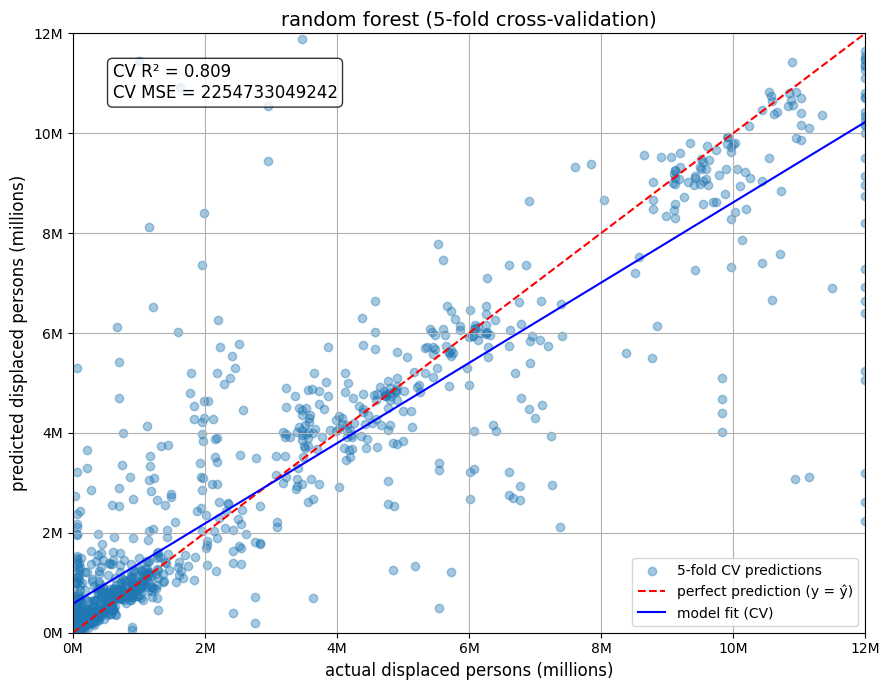

In [42]:
plt.figure(figsize=(9, 7))

# scatter plot of actual vs predicted (CV)
plt.scatter(y_capped, y_cv_pred_rf, alpha=0.4, label='5-fold CV predictions')

# identity line
plt.plot([0, 1.2e7], [0, 1.2e7], 'r--', label='perfect prediction (y = ŷ)')

# best-fit line
coeff = np.polyfit(y_capped, y_cv_pred_rf, 1)
fit_line = np.poly1d(coeff)
x_line = np.linspace(0, 1.2e7, 100)
plt.plot(x_line, fit_line(x_line), color='blue', label='model fit (CV)')

# axis formatting
plt.xlabel('actual displaced persons (millions)', fontsize=12)
plt.ylabel('predicted displaced persons (millions)', fontsize=12)
plt.xticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.yticks(np.linspace(0, 1.2e7, 7), labels=[f"{int(x/1e6)}M" for x in np.linspace(0, 1.2e7, 7)])
plt.xlim(0, 1.2e7)
plt.ylim(0, 1.2e7)

plt.title('random forest (5-fold cross-validation)', fontsize=14)
plt.legend()

# annotation box for R² and MSE
plt.text(
    0.05, 0.95,
    f"CV R² = {r2_cv_rf:.3f}\nCV MSE = {mse_cv_rf:.0f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.grid(True)
plt.tight_layout()
plt.show()

### random forest regression: performance overview

random forest performs significantly better than all previous models.

#### train/test split
- **train r² = 0.976**, **test r² = 0.766** → strong fit and much better generalization
- **test mse** is the lowest so far
- prediction line closely follows the identity line
- fewer large errors, especially at high displacement levels

#### cross-validation
- **cv r² = 0.809**, **cv mse ≈ 2.25 trillion**
- consistent performance across folds
- captures non-linear patterns missed by linear, ridge, and lasso

#### takeaway
random forest offers the best fit so far. it reduces both bias and variance, especially for larger displacement cases.

In [ ]:
# create a summary dictionary
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
    "Train R²": [r2_train, r2_train_ridge, r2_train_lasso, r2_train_rf],
    "Test R²": [r2_test, r2_test_ridge, r2_test_lasso, r2_test_rf],
    "Train MSE": [mse_train, mse_train_ridge, mse_train_lasso, mse_train_rf],
    "Test MSE": [mse_test, mse_test_ridge, mse_test_lasso, mse_test_rf],
    "CV R²": [r2_cv_lr, r2_cv_ridge, r2_cv_lasso, r2_cv_rf],
    "CV MSE": [mse_cv_lr, mse_cv_ridge, mse_cv_lasso, mse_cv_rf]
}

# convert to DataFrame
summary_df = pd.DataFrame(results)

# display rounded values for easier reading
summary_df_rounded = summary_df.copy()
summary_df_rounded[["Train R²", "Test R²", "CV R²"]] = summary_df_rounded[["Train R²", "Test R²", "CV R²"]].round(3)
summary_df_rounded[["Train MSE", "Test MSE", "CV MSE"]] = summary_df_rounded[["Train MSE", "Test MSE", "CV MSE"]].applymap(lambda x: f"{int(x):,}")

# show table
summary_df_rounded

NameError: name 'r2_cv_lr' is not defined

### Model Comparison Summary

The table below summarizes the performance of all four models using three metrics: training R² and MSE, test R² and MSE, and 5-fold cross-validated R² and MSE. This helps compare how well each model fits the training data, generalizes to unseen data, and performs on average across multiple folds.

- **Linear Regression** performs modestly, with underfitting especially for higher values.
- **Ridge Regression** improves generalization by reducing variance slightly while maintaining similar bias.
- **Lasso Regression** is comparable to ridge but tends to slightly underperform in this case, possibly due to shrinking too many coefficients.
- **Random Forest** significantly outperforms the linear models, capturing nonlinear patterns and interactions, though it shows signs of overfitting (very high train R²).

| Model              | Train R² | Test R² | Train MSE       | Test MSE        | CV R² | CV MSE        |
|-------------------|----------|---------|------------------|------------------|-------|----------------|
| Linear Regression | 0.467    | 0.102   | 2.30e+13         | 1.88e+13         | 0.588 | 4.80e+12       |
| Ridge Regression  | 0.724    | 0.456   | 3.33e+13         | 5.83e+12         | 0.608 | 4.58e+12       |
| Lasso Regression  | 0.726    | 0.383   | 3.30e+13         | 6.60e+12         | 0.590 | 4.84e+12       |
| Random Forest     | 0.976    | 0.766   | 2.85e+12         | 2.51e+12         | 0.809 | 2.25e+12       |

Next step: explore model tuning (e.g., hyperparameters for ridge, lasso, and random forest), feature importance, or try other flexible models like XGBoost or gradient boosting.